# 3. Condense with Maximum Pooling

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3),
    layers.MaxPool2D(pool_size=2),
])

detect(ReLU)하고 나면 유용하지않은(?) 0들이 많이 남고 size가 커진다.  
그래서 feature map을 condense함으로써 유용한 부분들만 남긴다.(maximum pooling role)

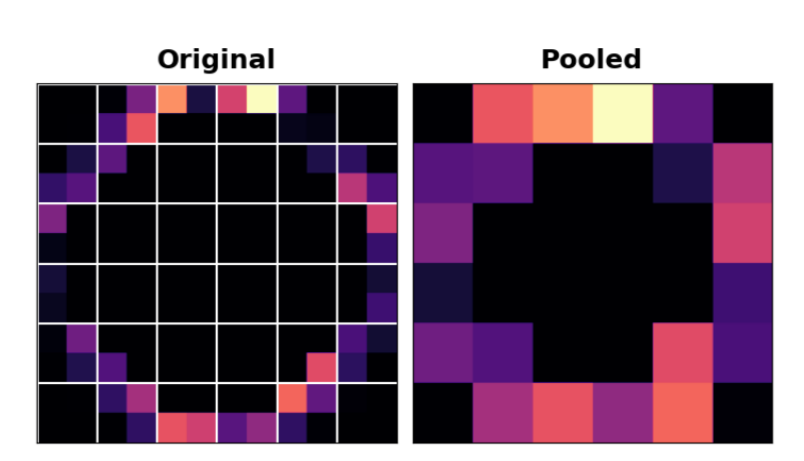

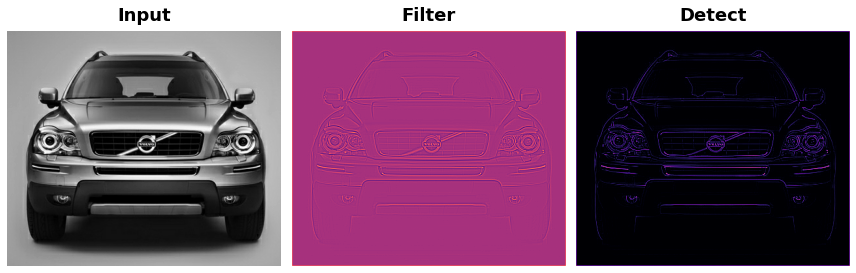

In [2]:
#example
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
      titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

image_path = "input/computer-vision-resources/car_feature.jpg"
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

kernel = tf.constant([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1],
], dtype=tf.float32)

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

image_filter = tf.nn.conv2d(input=image,
                           filters=kernel,
                           strides=1,
                           padding='SAME')

image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')
plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
plt.show();

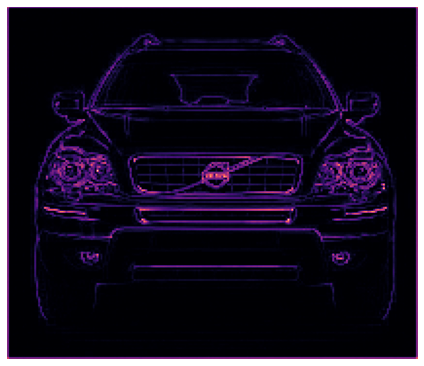

In [4]:
# Condense, using tf.nn.pool
import tensorflow as tf
image_condense = tf.nn.pool(input=image_detect,
                           window_shape=(2,2),
                           pooling_type='MAX', # Maxpooling 사용
                           strides=(2,2), 
                           padding='SAME',);

plt.figure(figsize=(6,6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();

features intensified된 것을 확인 가능함.(가장 활성화된 pixel들로 condense함으로써 가능했다.)

zero-pixel들은 positional information가지고 있음.  
맥스풀링을 하게되면 따라서 몇몇의 positional info들이 사라짐(distinguish불가능)  
이를 **translation invariance**라고 부름.

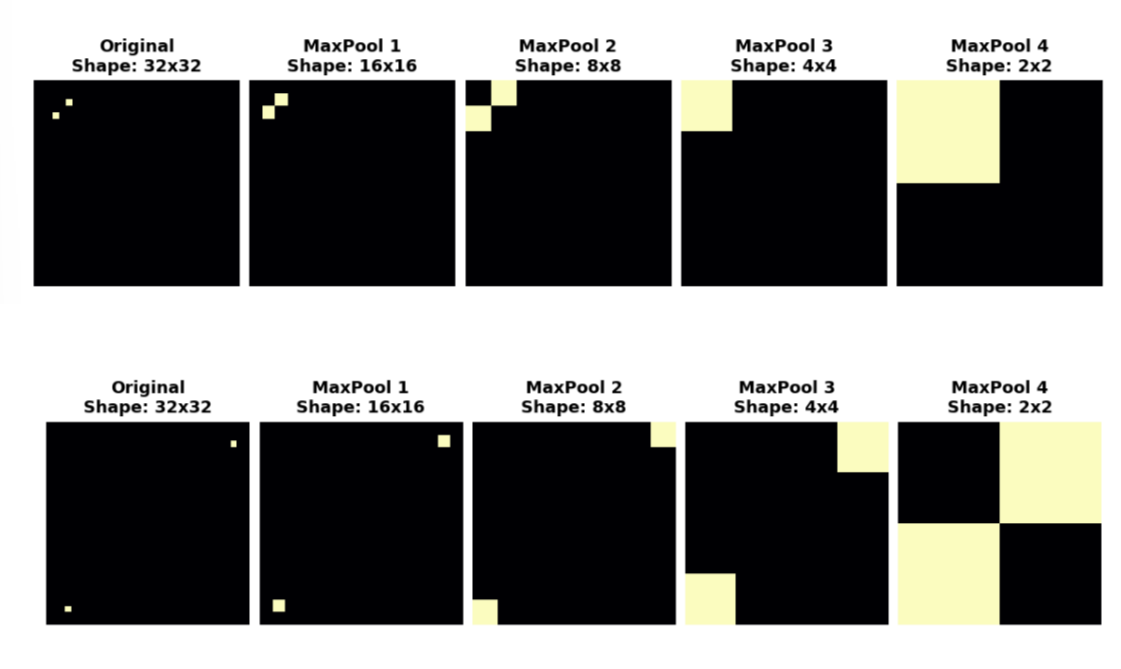